In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

Padding with zeros all images of the dataset X.  X -- array of shape (m, n_H, n_W, n_C) representing a batch of m images
    pad -- integer i.e. amount of padding around each image on vertical and horizontal dimensions.  Returns:
    X_pad -- padded image of shape (m, n_H + 2*pad, n_W + 2*pad, n_C)

In [2]:
def zero_pad(X, pad):
    X_pad = np.pad(X, ((0, 0), (pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=0)       
    return X_pad

Testing zero padding

In [3]:
x = np.random.randn(4, 3, 3, 2)
x_pad = zero_pad(x, 2)
print ("x.shape =", x.shape)
print ("x_pad.shape =", x_pad.shape)
print ("x[1, 1] =", x[1, 1])
print ("x_pad[1, 1] =", x_pad[1, 1])

x.shape = (4, 3, 3, 2)
x_pad.shape = (4, 7, 7, 2)
x[1, 1] = [[-0.40605877 -0.3269399 ]
 [-1.57734357 -1.21269846]
 [ 1.47252001 -0.2846506 ]]
x_pad[1, 1] = [[0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


Showing the original image and the padded image using matplotlib plots

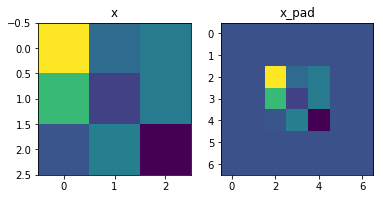

In [4]:
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x')
axarr[0].imshow(x[0,:,:,0])
axarr[1].set_title('x_pad')
axarr[1].imshow(x_pad[0,:,:,0])

A single slice of output activation of previous layer is taken i.e. a_slice_prev of shape [f,f,nCprev] and one filter defined by parameter W is applied. Here W is matrix of shape [f,f,nCprev] and bias b is [1,1,1]

In [5]:
def convolution_singlestep(a_slice_prev, W, b) :
        s = np.multiply(a_slice_prev, W) + b
        print (s)
        Z=np.sum(s)
        return Z

Testing slice of output activation

In [6]:
a_slice_prev = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn(1, 1, 1)

Z = convolution_singlestep(a_slice_prev, W, b)
print("Z =", Z)

[[[ 2.28652806e-01 -2.02466847e+00 -7.75179842e-01]
  [-1.33619250e-01  3.42019302e-01 -2.58669880e-01]
  [-1.87702537e-01 -9.94597143e-01 -1.45653540e+00]
  [-2.61457672e-01 -1.74010580e-01 -2.65676289e-01]]

 [[-5.71482970e-02 -7.75182458e-01 -3.70787630e-01]
  [ 1.04837818e+00 -1.36256661e-01 -1.30441601e-01]
  [-8.78774154e-01 -1.37250485e+00 -1.55991489e-01]
  [ 1.41545194e+00  1.18829463e+00  2.79094928e-01]]

 [[-4.92576866e-01  5.48418625e-03  1.16422983e-01]
  [ 2.14462799e+00 -2.17414761e-01  9.74596863e-01]
  [ 9.05235132e-01 -3.55227192e-01 -1.33447997e-01]
  [ 5.87451172e-01 -7.59778744e-01 -1.90915193e+00]]

 [[-1.03989616e-01 -1.27352168e-03 -1.52837630e+00]
  [ 7.13814886e-01  2.88930997e-01 -4.65484873e-02]
  [-1.14363698e-02  3.17472747e-01 -5.93393314e-01]
  [ 6.33784025e-02  1.20921469e+00 -1.63912139e-01]]]
Z = -4.8972095980472075


This is the forward prop step. The input for this is A_prev which is output activation of prev layer. its shape is [m, nHprev, nWprev, nCprev] for a batch of m inputs.There are F filters/weights denoted  by W.  hparameters -- python dictionary containing "stride" and "pad".  Returns:
    Z -- conv output of shape (m, n_H, n_W, n_C) and cache -- cache of values needed for the conv_backward() function

In [7]:
def conv_forward(A_prev, W, b, hparameters):
    # Retrieve dimensions from A_prev's shape 
    (m, nHprev, nWprev, nCprev) = A_prev.shape
    
    # Retrieve dimensions from W's shape 
    (f, f, nCprev, nC) = W.shape
    stride = hparameters['stride']
    pad = hparameters['pad']
    
  
    nH = int((nHprev - f + 2 * pad) / stride) + 1
    nW = int((nWprev - f + 2 * pad) / stride) + 1
    
    # Initialize the output volume Z with zeros.
    Z = np.zeros((m, nH, nW, nC))   
    A_prev_pad = zero_pad(A_prev, pad)
    
    for i in range(m):                                 
        a_prev_pad = A_prev_pad[i]                     # Select ith training example's padded activation
        for h in range(nH):                           # loop over vertical axis of the output volume
            for w in range(nW):                       # loop over horizontal axis of the output volume
                for c in range(nC):                   # loop over channels
                    # Find the corners of the current "slice"
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    # Use the corners to define the (3D) slice of a_prev_pad
                    a_slice_prev = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                   
                    Z[i, h, w, c] = convolution_singlestep(a_slice_prev, W[...,c], b[...,c])
                                        
     # Making sure output shape is correct
    assert(Z.shape == (m, nH, nW, nC))
    
    # Save information in "cache" for the backprop
    cache = (A_prev, W, b, hparameters)
    
    return Z, cache

Testing Cache

In [8]:
A_prev = np.random.randn(10, 4, 4, 3)
W = np.random.randn(2, 2, 3, 8)
b = np.random.randn(1, 1, 1, 8)
hparameters = {"pad" : 2,"stride": 1}

Z, cache_conv = conv_forward(A_prev, W, b, hparameters)
print("Z's mean =", np.mean(Z))
print("cache_conv[0][1][2][3] =", cache_conv[0][1][2][3])

[[[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]

 [[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]]
[[[-0.77117466 -0.77117466 -0.77117466]
  [-0.77117466 -0.77117466 -0.77117466]]

 [[-0.77117466 -0.77117466 -0.77117466]
  [-0.77117466 -0.77117466 -0.77117466]]]
[[[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]

 [[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]]
[[[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]

 [[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]]
[[[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]

 [[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]]
[[[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]

 [[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]]
[[[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.399600

  [1.02061524 0.95913274 1.60311412]]]
[[[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.39960089]]

 [[-0.66740766 -0.46550601 -1.7368058 ]
  [-0.44069528 -0.39968125  2.04001943]]]
[[[-1.38145455 -1.38145455 -1.38145455]
  [-1.38145455 -1.38145455 -1.38145455]]

 [[-1.01880339 -1.67104704 -3.84684119]
  [-0.71998529 -1.38252768 -0.25764271]]]
[[[0.7107507  0.7107507  0.7107507 ]
  [0.7107507  0.7107507  0.7107507 ]]

 [[0.76897097 0.7006285  1.61638327]
  [0.74566054 1.12447303 0.02943306]]]
[[[-0.77117466 -0.77117466 -0.77117466]
  [-0.77117466 -0.77117466 -0.77117466]]

 [[-1.03334491 -0.77336495  0.65433902]
  [-0.94038895 -1.00300314 -1.71072996]]]
[[[0.3348034  0.3348034  0.3348034 ]
  [0.3348034  0.3348034  0.3348034 ]]

 [[0.01295711 0.33071813 1.86832462]
  [0.12328816 1.58124615 2.49109946]]]
[[[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]

 [[-0.81331865 -0.59914985 -1.22423827]
  [-0.34031053  0.32623876  0.10756671]]]
[

[[[-1.00631261 -1.57468036 -1.19112056]
  [-1.38145455 -1.38145455 -1.38145455]]

 [[-1.35048046 -0.16133002 -3.80611226]
  [-1.38145455 -1.38145455 -1.38145455]]]
[[[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]

 [[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]]
[[[-0.77117466 -0.77117466 -0.77117466]
  [-0.77117466 -0.77117466 -0.77117466]]

 [[-0.77117466 -0.77117466 -0.77117466]
  [-0.77117466 -0.77117466 -0.77117466]]]
[[[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]

 [[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]]
[[[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]

 [[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]]
[[[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]

 [[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]]
[[[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.

  [0.95951852 0.95951852 0.95951852]]]
[[[-0.21005638 -2.65738994 -0.37266935]
  [-0.39960089 -0.39960089 -0.39960089]]

 [[-0.41989909 -0.42348056 -0.15596322]
  [-0.39960089 -0.39960089 -0.39960089]]]
[[[-1.9177417   0.46755717 -1.54384053]
  [-1.38145455 -1.38145455 -1.38145455]]

 [[-1.3539677  -1.48638378 -0.93226306]
  [-1.38145455 -1.38145455 -1.38145455]]]
[[[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]

 [[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]]
[[[-0.77117466 -0.77117466 -0.77117466]
  [-0.77117466 -0.77117466 -0.77117466]]

 [[-0.77117466 -0.77117466 -0.77117466]
  [-0.77117466 -0.77117466 -0.77117466]]]
[[[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]

 [[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]]
[[[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]

 [[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]]
[[[-0.83761671 -0.8376167

  [-0.4662756  -0.37664004 -1.20802533]]]
[[[-0.98499908 -1.39904853 -1.68705391]
  [-0.22174816 -1.28513321 -2.67538997]]

 [[-0.80579228  0.13464855 -1.35108977]
  [-0.30823573 -1.07483331 -1.75385551]]]
[[[ 2.13700972 -0.16854104 -0.82604447]
  [ 1.17686081  3.60257327  0.97540287]]

 [[ 0.80521176  3.60291709  0.41064848]
  [ 0.76551463  1.01959902  0.85144054]]]
[[[-1.85138578  0.78693842 -1.44185744]
  [-0.48678119 -0.57365515 -0.83888707]]

 [[-1.19653992 -0.1453552  -1.24355148]
  [-1.03662532 -0.9442372  -0.5771596 ]]]
[[[ 1.40671274e-01  4.49553738e-01  4.19697465e+00]
  [ 2.02090499e+00 -3.88888859e+00 -1.40217327e-01]]

 [[-1.87384873e-01  1.50206576e+00 -1.73364210e-01]
  [ 2.99418800e-03  1.26528678e+00 -1.10464609e-01]]]
[[[-0.48399892 -0.18598886  0.04385639]
  [ 0.46196073  0.3063859  -0.13718493]]

 [[-0.94736919 -0.26043696 -0.39043962]
  [-0.19377402  0.09196249 -0.74365923]]]
[[[-1.06641936 -1.96444841 -2.06102145]
  [-1.50926126 -2.94133589 -0.18991466]]

 [[-2.07

  [-0.77117466 -0.77117466 -0.77117466]]]
[[[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]

 [[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]]
[[[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]

 [[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]]
[[[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]

 [[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]]
[[[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]

 [[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]]
[[[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.39960089]]

 [[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.39960089]]]
[[[-1.38145455 -1.38145455 -1.38145455]
  [-1.38145455 -1.38145455 -1.38145455]]

 [[-1.38145455 -1.38145455 -1.38145455]
  [-1.38145455 -1.38145455 -1.38145455]]]
[[[ 0.7107

  [-0.77117466 -0.77117466 -0.77117466]]]
[[[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]

 [[0.3348034 0.3348034 0.3348034]
  [0.3348034 0.3348034 0.3348034]]]
[[[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]

 [[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]]
[[[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]

 [[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]]
[[[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]

 [[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]]
[[[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.39960089]]

 [[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.39960089]]]
[[[-1.38145455 -1.38145455 -1.38145455]
  [-1.38145455 -1.38145455 -1.38145455]]

 [[-1.38145455 -1.38145455 -1.38145455]
  [-1.38145455 -1.38145455 -1.38145455]]]
[[[0.71075

  [0.3348034 0.3348034 0.3348034]]]
[[[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]

 [[-0.59796853 -0.59796853 -0.59796853]
  [-0.59796853 -0.59796853 -0.59796853]]]
[[[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]

 [[-0.83761671 -0.83761671 -0.83761671]
  [-0.83761671 -0.83761671 -0.83761671]]]
[[[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]

 [[0.95951852 0.95951852 0.95951852]
  [0.95951852 0.95951852 0.95951852]]]
[[[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.39960089]]

 [[-0.39960089 -0.39960089 -0.39960089]
  [-0.39960089 -0.39960089 -0.39960089]]]
[[[-1.38145455 -1.38145455 -1.38145455]
  [-1.38145455 -1.38145455 -1.38145455]]

 [[-1.38145455 -1.38145455 -1.38145455]
  [-1.38145455 -1.38145455 -1.38145455]]]
[[[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]

 [[0.7107507 0.7107507 0.7107507]
  [0.7107507 0.7107507 0.7107507]]]
[[[-0.77117466 -

Now implementing max pool and avg pool in same function with help of if-else. There are no parameters but there are hyperparameters such as window size f.

In [9]:
def pool_forward(A_prev, hparameters, mode = "max"):
     # Retrieve dimensions from the input shape
    (m, nHprev, nWprev, nCprev) = A_prev.shape
    
    # Retrieve hyperparameters from "hparameters"
    f = hparameters["f"]
    stride = hparameters["stride"]
    
    nH = int(1 + (nHprev - f) / stride)
    nW = int(1 + (nWprev - f) / stride)
    nC = nCprev
    
    # Initialize output matrix A
    A = np.zeros((m, nH, nW, nC))              
    
    for i in range(m):                         
        for h in range(nH):                   
            for w in range(nW):               
                for c in range (nC):          
                    
                    vert_start = h * stride
                    vert_end = vert_start + f
                    horiz_start = w * stride
                    horiz_end = horiz_start + f
                    
                    a_prev_slice = A_prev[i, vert_start:vert_end, horiz_start:horiz_end, c]
                    
                    if mode == "max":
                        A[i, h, w, c] = np.max(a_prev_slice)
                    elif mode == "average":
                        A[i, h, w, c] = np.mean(a_prev_slice)
    
 
    cache = (A_prev, hparameters)
    
    assert(A.shape == (m, nH, nW, nC))
    
    return A, cache

Testing max_pooling or average pooling

In [10]:
A_prev = np.random.randn(2, 4, 4, 3)
hparameters = {"stride" : 1, "f": 4}

A, cache = pool_forward(A_prev, hparameters)
print("mode = max")
print("A =", A)
print()
A, cache = pool_forward(A_prev, hparameters, mode = "average")
print("mode = average")
print("A =", A)

mode = max
A = [[[[1.83515714 1.87284819 1.47432344]]]


 [[[1.40500403 2.62760127 1.09547617]]]]

mode = average
A = [[[[-0.30167121 -0.22579753 -0.04400147]]]


 [[[-0.1247935   0.26521388 -0.08977995]]]]


In [11]:
def conv_backward(dZ, cache):
    (A_prev, W, b, hparameters) = cache
    
    (m, nHprev, nWprev, nCprev) = A_prev.shape      
    (f, f, nCprev, nC) = W.shape
    
    stride = hparameters["stride"]
    pad = hparameters["pad"]    
    
    (m, nH, nW, nC) = dZ.shape
    
    # Initialize dA_prev, dW, db with the correct shapes
    dA_prev = np.zeros((m, nHprev, nWprev, nCprev))                           
    dW = np.zeros((f, f, nCprev, nC))
    db = np.zeros((1, 1, 1, nC))

    # Pad A_prev and dA_prev
    A_prev_pad = zero_pad(A_prev, pad)
    dA_prev_pad = zero_pad(dA_prev, pad)
    
    for i in range(m):                     
        
    
        a_prev_pad = A_prev_pad[i]
        da_prev_pad = dA_prev_pad[i]
        
        for h in range(nH):                
            for w in range(nW):             
                for c in range(nC):          
                    
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f                    
                   
                    a_slice = a_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :]
                  
                    da_prev_pad[vert_start:vert_end, horiz_start:horiz_end, :] += W[:,:,:,c] * dZ[i, h, w, c]
                    dW[:,:,:,c] += a_slice * dZ[i, h, w, c]
                    db[:,:,:,c] += dZ[i, h, w, c]
                    
        # Set the ith training example's dA_prev to the unpaded da_prev_pad
        dA_prev[i, :, :, :] = da_prev_pad[pad:-pad, pad:-pad, :]
    
  
    assert(dA_prev.shape == (m, nHprev, nWprev, nCprev))

    return dA_prev, dW, db

Testing of backprop

In [12]:
dA, dW, db = conv_backward(Z, cache_conv)
print("dA_mean =", np.mean(dA))
print("dW_mean =", np.mean(dW))
print("db_mean =", np.mean(db))

dA_mean = 12.737862386361572
dW_mean = -22.00178102528024
db_mean = -1465.4826529183254


Even though a pooling layer has no parameters for backprop to update, you still need to backpropagation the gradient through the pooling layer in order to compute gradients for layers that came before the pooling layer. The helper function create_mask_from_window() creates a "mask" matrix which keeps track of where the maximum of the matrix is. True (1) indicates the position of the maximum in X, the other entries are False (0).

In [13]:
def create_mask_from_window(x):
  
    mask = x == np.max(x)   
    return mask

Here mask and input x are arrays of same shape [f,f]               
   


"""Testing""" 

In [14]:
x = np.random.randn(2,3)
mask = create_mask_from_window(x)
print('x = ', x)
print("mask = ", mask)

x =  [[ 0.00116912 -0.43234448 -1.1384518 ]
 [ 0.24680746 -0.84430275 -0.19087458]]
mask =  [[False False False]
 [ True False False]]


In average pooling, every element of the input window has equal influence on the output. So to implement backprop, we will now implement a helper function that reflects this i.e. to equally distribute a value dz through a matrix of dimension shape.

    shape -- the shape (n_H, n_W) of the output matrix for which we want to distribute the value of dz
    a -- Array of size (n_H, n_W) for which we distributed the value of dz

In [15]:
def distribute_value(dz, shape):
      
   
    (nH, nW) = shape
 
    average = dz / (nH * nW)
    a = np.ones(shape) * average
    return a
  

Testing

In [16]:
a = distribute_value(2, (2,2))
print('distributed value =', a)

distributed value = [[0.5 0.5]
 [0.5 0.5]]


Implementing the pool_backward function in both modes ("max" and "average").  cache -- cache output from the forward pass of the pooling layer, contains the layer's input and hparameters. dA -- gradient of cost with respect to the output of the pooling layer, same shape as A. Returns:
    dA_prev -- gradient of cost with respect to the input of the pooling layer, same shape as A_prev

In [17]:
def pool_backward(dA, cache, mode = "max"):
     (A_prev, hparameters) = cache    
   
     stride = hparameters["stride"]
     f = hparameters["f"]
    
   
     m, nHprev, nWprev, nCprev = A_prev.shape
     m, nH, nW, nC = dA.shape    
   
     dA_prev = np.zeros(A_prev.shape)
    
     for i in range(m):                     
      
        a_prev = A_prev[i]
        for h in range(nH):              
            for w in range(nW):              
                for c in range(nC):       
                   
                    vert_start = h
                    vert_end = vert_start + f
                    horiz_start = w
                    horiz_end = horiz_start + f
                    
              
                    if mode == "max":
                     
                        a_prev_slice = a_prev[vert_start:vert_end, horiz_start:horiz_end, c]
                     
                        mask = create_mask_from_window(a_prev_slice)
                        
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += np.multiply(mask, dA[i, h, w, c])
                        
                    elif mode == "average":
                        
                        da = dA[i, h, w, c]
                       
                        shape = (f, f)
                       
                        dA_prev[i, vert_start:vert_end, horiz_start:horiz_end, c] += distribute_value(da, shape)
                        

    
     assert(dA_prev.shape == A_prev.shape)
    
     return dA_prev

Testing

In [18]:
A_prev = np.random.randn(5, 5, 3, 2)
hparameters = {"stride" : 1, "f": 2}
A, cache = pool_forward(A_prev, hparameters)
dA = np.random.randn(5, 4, 2, 2)

dA_prev = pool_backward(dA, cache, mode = "max")
print("mode = max")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])  
print()
dA_prev = pool_backward(dA, cache, mode = "average")
print("mode = average")
print('mean of dA = ', np.mean(dA))
print('dA_prev[1,1] = ', dA_prev[1,1])

mode = max
mean of dA =  -0.08619915009397222
dA_prev[1,1] =  [[ 0.         -2.3766035 ]
 [-0.20424123  0.        ]
 [ 0.          0.70583077]]

mode = average
mean of dA =  -0.08619915009397222
dA_prev[1,1] =  [[-0.02611159 -0.56300239]
 [-0.05106031 -0.3865447 ]
 [-0.02494872  0.17645769]]
